In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matlab.engine

In [2]:
# =========================================================================================================
#  Timepoint names and variable names
# =========================================================================================================

timepoint_names = [ 'Before Surgery', '5 Minutes', '30 Minutes', '60 Minutes', 
    '120 Minutes', '1 Day', '2 Days', '3 Days', 
    '4 Days', '10 Days', '3 Months', '6 Months', '1 Year' ]


variable_names = ['TNF', 'JAK', 'STAT3', 'SOCS3', 'ECM', 
                  'IE', 'GF', 'Q', 'P', 'R']


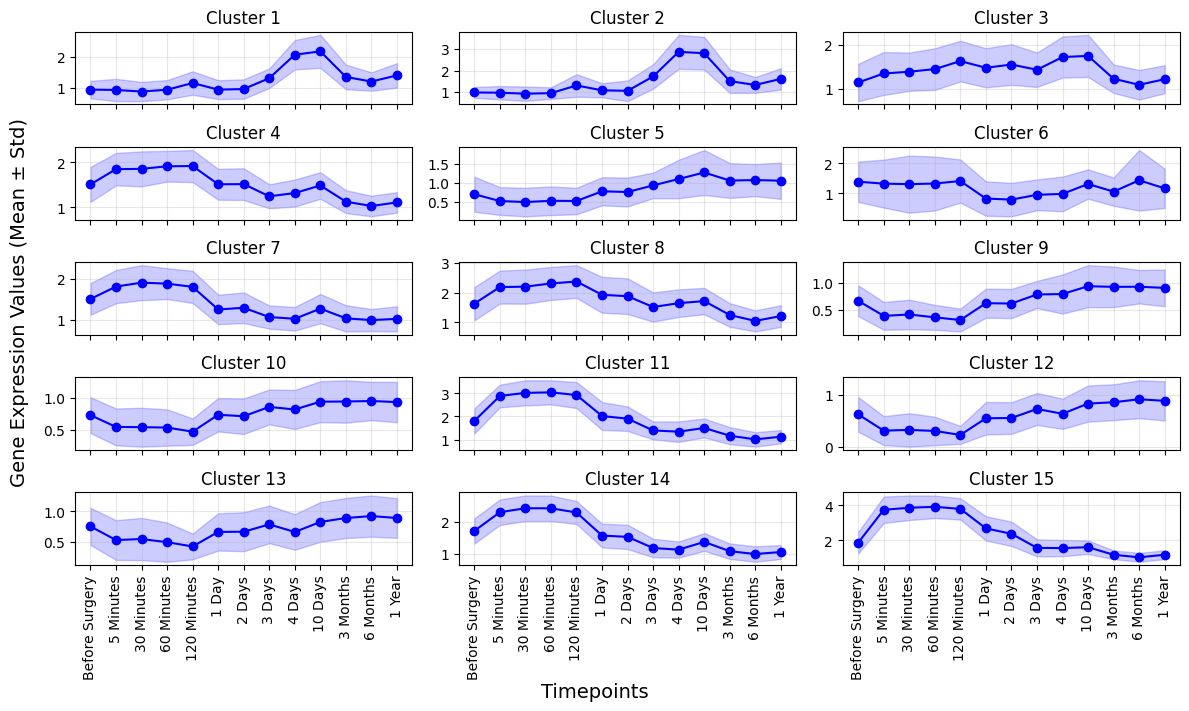

In [37]:
# ================================================================================================
# Plot the mean and standard deviation of gene values: original data with filled regions
# ================================================================================================

# Construct patient and cluster labels to filter mean and std data for the specific patient and timepoint
patient_id = 10
patient_label = f"Patient_{patient_id}"

# Load mean data
mean_data_path = 'input_data_mean.csv'
df_mean_data = pd.read_csv(mean_data_path)

# Load standard deviation data
std_data_path = 'input_data_std.csv'
df_std_data = pd.read_csv(std_data_path)

# Define the timepoint column name based on the timepoint index
num_timepoints = 13
timepoint_values = np.arange(1, num_timepoints + 1)

# Filter the data to get only rows that match the specified patient
patient_mean_data = df_mean_data[df_mean_data['Patient'] == patient_label]
patient_std_data = df_std_data[df_std_data['Patient'] == patient_label]

# Extract mean and std data vectors for the specified timepoints across all clusters
mean_data = patient_mean_data.iloc[:, 2:].values  # Exclude first two columns (Patient, Cluster)
std_data = patient_std_data.iloc[:, 2:].values  # Exclude first two columns (Patient, Cluster)

# Create a 4 by 4 subplot grid
fig, axes = plt.subplots(5, 3, figsize=(12, 7), sharex=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot data for each cluster
for idx in range(mean_data.shape[0]):  # Loop through clusters
    # Plot mean curve
    axes[idx].plot(timepoint_names, mean_data[idx, :], '-o', label=f"Cluster {idx + 1}", color='blue')
    
    # Add shaded region for std deviation
    axes[idx].fill_between(
        timepoint_names,
        mean_data[idx, :] - std_data[idx, :],
        mean_data[idx, :] + std_data[idx, :],
        color='blue',
        alpha=0.2
    )
    
    # Customize subplot
    axes[idx].set_xticks(timepoint_names)  # Set x-axis ticks with the timepoint names 
    axes[idx].set_xticklabels(timepoint_names, rotation=90)  # Rotate tick labels
    axes[idx].set_title(f"Cluster {idx + 1}", fontsize=12)
    axes[idx].grid(alpha=0.3)
    if idx == 6:  # Label only the first subplot in each row
        axes[idx].set_ylabel("Gene Expression Values (Mean ± Std) \n", fontsize=14)

# Set the x-axis labels across all subplots
fig.text(0.5, -0.004, 'Timepoints', ha='center', fontsize=14)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()
